# Python for Neuroscientists Week 9 - Navigating Packages + Data Science

## Warmup: loading data
We'll be using the same SST dataset that we used two classes ago. Please load in this dataset. If you don't remember how to do this ... google it :)

Also just a reminder that you may have to import a few packages to make this work. This is also up to you to figure out.

<details>
<summary>Click here for a hint!</summary>
https://www.w3schools.com/python/pandas/pandas_csv.asp <br>
</details>

In [1]:
#Load in the SST dataset here
import pandas as pd
df = pd.read_csv ('SST_data.csv')
print(df)

            dF/F  time_from_stim     cell_id  exposure  trial_id  omitted  \
0       0.213396       -1.228129  1086500633  familiar        24    False   
1      -0.096333       -1.195810  1086500633  familiar        24    False   
2      -0.117812       -1.163491  1086500633  familiar        24    False   
3       0.096526       -1.131172  1086500633  familiar        24    False   
4      -0.000783       -1.098852  1086500633  familiar        24    False   
...          ...             ...         ...       ...       ...      ...   
689770 -0.116568        1.357393  1086500770     novel      4802    False   
689771 -0.011238        1.389711  1086500770     novel      4802    False   
689772  0.057402        1.422030  1086500770     novel      4802    False   
689773  0.114362        1.454349  1086500770     novel      4802    False   
689774 -0.073561        1.486668  1086500770     novel      4802    False   

         pupil_area  mean_response  
0       5636.081391       0.055830  
1

## Running statistical testing in Python
Let's start with an easy problem. Say I want to compare pupil area between familiar and novel trials - let's begin by selecting a sample of each. 

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

In [3]:
familiar_sample = df[df.exposure == 'familiar'].sample(15)
novel_sample = df[df.exposure == 'novel'].sample(15)
#here, we've taken samples of novel and familiar trials

In [5]:
sampled_data = pd.concat([familiar_sample, novel_sample])
sampled_data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
3193,-0.030574,0.323192,1086500392,familiar,81,False,5597.616173,-0.037435
152301,-0.035924,0.904937,1086500872,familiar,1669,False,5669.572399,0.047943
279395,0.108589,-1.228129,1086500194,familiar,3040,True,6167.112126,0.117511
73118,0.210952,-0.646384,1086501106,familiar,834,False,5640.560463,0.076773
235260,-0.127615,0.872618,1086500297,familiar,2563,False,5956.287167,-0.017696
242372,-0.027502,-0.032319,1086500297,familiar,2616,True,5919.570953,0.004812
162711,-0.027719,-0.549426,1086500092,familiar,1765,False,5998.324446,0.012282
373438,-0.080532,-0.161596,1086500392,familiar,4362,True,7710.716761,-0.016178
181264,-0.094674,0.193915,1086501106,familiar,1988,True,5956.703181,-0.025803
217763,-0.013007,1.292768,1086499911,familiar,2342,True,6278.434933,0.026078


<AxesSubplot:xlabel='exposure', ylabel='pupil_area'>

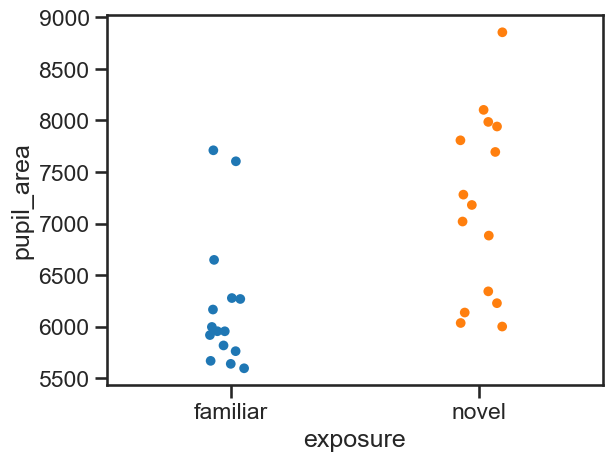

In [8]:
sns.stripplot(data = sampled_data, x = 'exposure', y = 'pupil_area', size = 7)


In [12]:
a = familiar_sample["pupil_area"]
b = novel_sample["pupil_area"]

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
3193,-0.030574,0.323192,1086500392,familiar,81,False,5597.616173,-0.037435
152301,-0.035924,0.904937,1086500872,familiar,1669,False,5669.572399,0.047943
279395,0.108589,-1.228129,1086500194,familiar,3040,True,6167.112126,0.117511
73118,0.210952,-0.646384,1086501106,familiar,834,False,5640.560463,0.076773
235260,-0.127615,0.872618,1086500297,familiar,2563,False,5956.287167,-0.017696
242372,-0.027502,-0.032319,1086500297,familiar,2616,True,5919.570953,0.004812
162711,-0.027719,-0.549426,1086500092,familiar,1765,False,5998.324446,0.012282
373438,-0.080532,-0.161596,1086500392,familiar,4362,True,7710.716761,-0.016178
181264,-0.094674,0.193915,1086501106,familiar,1988,True,5956.703181,-0.025803
217763,-0.013007,1.292768,1086499911,familiar,2342,True,6278.434933,0.026078


In [13]:
from scipy.stats import ttest_ind
ttest_ind(a,b)

Ttest_indResult(statistic=-3.393248198289886, pvalue=0.002078395740659691)

### Problem 1
Alright, time for a little challenge. You're going to figure out how to do stats in python. Well, to be specific, you're going to tell me what to do.

<details>
<summary>Click here for a hint!</summary>
Sorry, you don't get a hint, you're the instructor. ¯\(°_o)/¯ <br>
</details>

### Problem 2
Your turn! Please run a one-way ANOVA on mean_response during omitted trials. I'll be such a great instructor and even set up your data for you.

As a bonus, please plot your data as well.

Google away! As a hint, you should be using scipy for this.

In [19]:
from scipy.stats import f_oneway

In [20]:
present_sample = df[df.omitted == False].sample(15)
omitted_sample = df[df.omitted == True].sample(15)

In [21]:
a = present_sample["mean_response"]
b = omitted_sample["mean_response"]

In [22]:
f_oneway(a, b)

F_onewayResult(statistic=15.360563171685047, pvalue=0.0005215646628509038)

## Navigating a package

What if we want to run a linear regression, say on pupil_area vs. mean_response?

Let's take this opportunity to walk though sklearn in a little bit more detail.

<AxesSubplot:xlabel='pupil_area', ylabel='mean_response'>

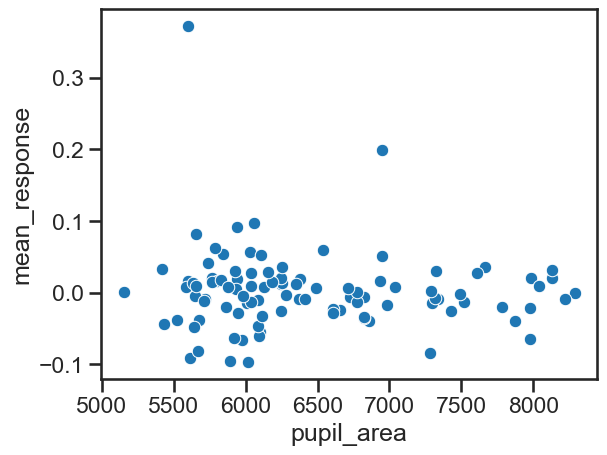

In [23]:
#Plot our data
df_sample = df.sample(100)
sns.scatterplot(data = df_sample, x = 'pupil_area', y = 'mean_response')

In [31]:
#arrange our data
X = df_sample['pupil_area'].dropna()
y = df.loc[X.index]['mean_response'].to_numpy().reshape(-1,1)
X = X.to_numpy().reshape(-1,1)

In [32]:
#run regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [35]:
#check results
reg.predict(np.array([[6000]]))

array([[0.00522782]])

### Builiding a simple classifier

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [47]:
X = df['dF/F'].to_numpy().reshape(-1, 85)[0:4000]
y = df['omitted'].to_numpy().reshape(-1, 85)[0:4000,0]

In [ ]:
# based on traces, predict whether image is projected or not
# x is trials and time point
# y is true/false

In [48]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [53]:
X = df['dF/F'].to_numpy().reshape(-1, 85)
y_test = df['omitted'].to_numpy().reshape(-1, 85)[:,0]

In [51]:
np.where(y_test)

(array([  60,   61,   62, ..., 3969, 3970, 3971]),)

In [57]:
clf.predict([X[49]])

array([False])